In [90]:
import json
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose

In [91]:
data = pd.read_json('result.json')

In [92]:
data

,name,type,id,messages
0,Анархия,personal_chat,4477182049,"{'id': 633, 'type': 'service', 'date': '2016-1..."
1,Анархия,personal_chat,4477182049,"{'id': 634, 'type': 'message', 'date': '2016-1..."
2,Анархия,personal_chat,4477182049,"{'id': 635, 'type': 'message', 'date': '2016-1..."
3,Анархия,personal_chat,4477182049,"{'id': 636, 'type': 'message', 'date': '2016-1..."
4,Анархия,personal_chat,4477182049,"{'id': 637, 'type': 'message', 'date': '2016-1..."
...,...,...,...,...
9247,Анархия,personal_chat,4477182049,"{'id': 154841, 'type': 'message', 'date': '202..."
9248,Анархия,personal_chat,4477182049,"{'id': 154842, 'type': 'message', 'date': '202..."
9249,Анархия,personal_chat,4477182049,"{'id': 155072, 'type': 'message', 'date': '202..."
9250,Анархия,personal_chat,4477182049,"{'id': 155073, 'type': 'message', 'date': '202..."


In [93]:
def convert_message_to_columns(row):
    return pd.Series(row)

In [94]:
messages = data['messages'].apply(convert_message_to_columns)

In [95]:
messages.columns

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'text', 'from',
       'from_id', 'photo', 'width', 'height', 'file', 'thumbnail',
       'media_type', 'sticker_emoji', 'mime_type', 'forwarded_from',
       'contact_information', 'duration_seconds', 'discard_reason', 'edited',
       'contact_vcard', 'reply_to_message_id', 'location_information'],
      dtype='object')

In [96]:
messages = messages.drop(['id', 'actor_id', 'from_id', 'photo', 'width', 'height', 'file', 'thumbnail', 'media_type', 'mime_type', 'forwarded_from',
       'contact_information', 'discard_reason', 'edited',
       'contact_vcard', 'reply_to_message_id', 'location_information'], axis=1)

In [97]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              9252 non-null   object 
 1   date              9252 non-null   object 
 2   actor             183 non-null    object 
 3   action            183 non-null    object 
 4   text              9252 non-null   object 
 5   from              9069 non-null   object 
 6   sticker_emoji     89 non-null     object 
 7   duration_seconds  158 non-null    float64
dtypes: float64(1), object(7)
memory usage: 578.4+ KB


In [98]:
messages['date'] = pd.to_datetime(messages['date'])
messages

,type,date,actor,action,text,from,sticker_emoji,duration_seconds
0,service,2016-12-24 15:43:51,Maximov Gleb,clear_history,,NaN,NaN,NaN
1,message,2016-12-24 16:33:47,NaN,NaN,Отправь,Maximov Gleb,NaN,NaN
2,message,2016-12-24 16:33:49,NaN,NaN,Ещё раз,Maximov Gleb,NaN,NaN
3,message,2016-12-24 16:33:51,NaN,NaN,Скайп,Maximov Gleb,NaN,NaN
4,message,2016-12-24 16:33:54,NaN,NaN,Почему все удалилось,Maximov Gleb,NaN,NaN
...,...,...,...,...,...,...,...,...
9247,message,2020-10-30 16:16:13,NaN,NaN,Мне тоже понравилось \nВ театре девочка костюм...,Анархия,NaN,NaN
9248,message,2020-10-30 16:16:51,NaN,NaN,Не в фигме это точно🙈. Туплю,Анархия,NaN,NaN
9249,message,2020-11-05 10:58:14,NaN,NaN,Глебушка. Куда пропал?,Анархия,NaN,NaN
9250,message,2020-11-05 10:58:21,NaN,NaN,Все хорошо?,Анархия,NaN,NaN


In [99]:
def find_length_message(row):
    return len(row)

In [371]:
messages['day'] = messages['date'].dt.day
messages['week_day'] = messages['date'].dt.dayofweek
messages['month'] = messages['date'].dt.month
messages['year'] = messages['date'].dt.year
messages['lenght_of_message'] = messages['text'].apply(find_length_message)
messages['year_month'] = pd.to_datetime(messages['date'].dt.strftime('%Y-%m'))
messages = messages.replace(r'^\s*$', np.nan, regex=True)

In [372]:
messages

,type,date,actor,action,text,from,sticker_emoji,duration_seconds,day,week_day,month,year,lenght_of_message,year_month,year_month_week_day
0,service,2016-12-24 15:43:51,Maximov Gleb,clear_history,,NaN,NaN,NaN,24,5,12,2016,0,2016-12-01,2016-12-24
1,message,2016-12-24 16:33:47,NaN,NaN,Отправь,Maximov Gleb,NaN,NaN,24,5,12,2016,7,2016-12-01,2016-12-24
2,message,2016-12-24 16:33:49,NaN,NaN,Ещё раз,Maximov Gleb,NaN,NaN,24,5,12,2016,7,2016-12-01,2016-12-24
3,message,2016-12-24 16:33:51,NaN,NaN,Скайп,Maximov Gleb,NaN,NaN,24,5,12,2016,5,2016-12-01,2016-12-24
4,message,2016-12-24 16:33:54,NaN,NaN,Почему все удалилось,Maximov Gleb,NaN,NaN,24,5,12,2016,20,2016-12-01,2016-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,message,2020-10-30 16:16:13,NaN,NaN,Мне тоже понравилось \nВ театре девочка костюм...,Анархия,NaN,NaN,30,4,10,2020,134,2020-10-01,2020-10-30
9248,message,2020-10-30 16:16:51,NaN,NaN,Не в фигме это точно🙈. Туплю,Анархия,NaN,NaN,30,4,10,2020,28,2020-10-01,2020-10-30
9249,message,2020-11-05 10:58:14,NaN,NaN,Глебушка. Куда пропал?,Анархия,NaN,NaN,5,3,11,2020,22,2020-11-01,2020-11-05
9250,message,2020-11-05 10:58:21,NaN,NaN,Все хорошо?,Анархия,NaN,NaN,5,3,11,2020,11,2020-11-01,2020-11-05


<h2>Finish preparation data</h2>


In [373]:
def delete_letters_from_message(row):
    if isinstance(row, str):
        return re.sub(r'[a-zа-я!\\А-ЯA-Z.?ё\s)0-9\,\-\»;(\«:`\'\–\/\’\*+"@&%]', '', row)
    else:
        return ''

<h2>Emoji MA</h2>

In [203]:
messages_from_ma = messages[messages['from'] == 'Анархия']
messages_from_ma = messages_from_ma[(messages_from_ma['text'] != '') |
                   (messages_from_ma['duration_seconds'].notna()) |
                   (messages_from_ma['sticker_emoji'].notna())]
messages_from_ma['emoji_text'] = messages_from_ma['text'].apply(delete_letters_from_message)
messages_from_ma['emoji'] = messages_from_ma['sticker_emoji'].combine_first(messages_from_ma['emoji_text'])
messages_from_ma = messages_from_ma.drop(columns=['sticker_emoji', 'emoji_text'], axis=1)
messages_from_ma = messages_from_ma.replace(r'^\s*$', np.nan, regex=True)
messages_from_ma

,type,date,actor,action,text,from,duration_seconds,day,week_day,month,year,lenght_of_message,year_month,emoji
6,message,2016-12-24 16:34:37,NaN,NaN,У тебя в телеграмме скайп выше,Анархия,NaN,24,5,12,2016,30,2016-12-01,NaN
8,message,2016-12-24 16:34:50,NaN,NaN,И в скайпе я тебе послала вчера!!!!!,Анархия,NaN,24,5,12,2016,36,2016-12-01,NaN
14,message,2016-12-24 19:12:34,NaN,NaN,Поздравил?,Анархия,NaN,24,5,12,2016,10,2016-12-01,NaN
17,message,2016-12-24 19:29:44,NaN,NaN,❤,Анархия,NaN,24,5,12,2016,1,2016-12-01,❤
18,message,2016-12-26 10:10:59,NaN,NaN,Удачи,Анархия,NaN,26,0,12,2016,5,2016-12-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,message,2020-10-30 16:16:13,NaN,NaN,Мне тоже понравилось \nВ театре девочка костюм...,Анархия,NaN,30,4,10,2020,134,2020-10-01,NaN
9248,message,2020-10-30 16:16:51,NaN,NaN,Не в фигме это точно🙈. Туплю,Анархия,NaN,30,4,10,2020,28,2020-10-01,🙈
9249,message,2020-11-05 10:58:14,NaN,NaN,Глебушка. Куда пропал?,Анархия,NaN,5,3,11,2020,22,2020-11-01,NaN
9250,message,2020-11-05 10:58:21,NaN,NaN,Все хорошо?,Анархия,NaN,5,3,11,2020,11,2020-11-01,NaN


In [204]:
messages_from_ma.pivot(columns='year', values='emoji').notna().sum()

year
2016      2
2017    130
2018     56
2019     57
2020     79
dtype: int64

In [661]:
130 / (56 + 57 + 79 + 132)

0.4012345679012346

In [205]:
messages_from_ma[messages_from_ma['year'] == 2017]['emoji'].value_counts().head(10)

😘     30
❤     17
😉     11
👍      9
😂      6
😱      5
❤️     4
😚      4
🎁      3
🤣      3
Name: emoji, dtype: int64

In [206]:
messages_from_ma[messages_from_ma['year'] == 2018]['emoji'].value_counts().head(10)

😘     12
❤️     6
🤣      5
👍      5
😍      3
😊      3
😂      2
💑      2
😉      2
😻      2
Name: emoji, dtype: int64

In [207]:
messages_from_ma[messages_from_ma['year'] == 2019]['emoji'].value_counts().head(10)

❤️    11
😍      8
😘      4
🤣      4
🙏      3
👍      3
🙌      2
😜      2
🥰      2
👋      1
Name: emoji, dtype: int64

In [208]:
messages_from_ma[messages_from_ma['year'] == 2020]['emoji'].value_counts().head(10)

😉       11
❤️      10
🤣        9
🙈        7
👍        5
🙏        5
🥰        3
😘        3
🤷‍♀️     2
🙀        2
Name: emoji, dtype: int64

<h2>Emoji Gleb</h2>

In [209]:
messages_from_gleb = messages[messages['from'] == 'Maximov Gleb']
messages_from_gleb = messages_from_gleb[(messages_from_gleb['text'] != '') |
                   (messages_from_gleb['duration_seconds'].notna()) |
                   (messages_from_gleb['sticker_emoji'].notna())]

messages_from_gleb['emoji_text'] = messages_from_gleb['text'].apply(delete_letters_from_message)
messages_from_gleb['emoji'] = messages_from_gleb['sticker_emoji'].combine_first(messages_from_gleb['emoji_text'])
messages_from_gleb = messages_from_gleb.drop(columns=['sticker_emoji', 'emoji_text'], axis=1)
messages_from_gleb = messages_from_gleb.replace(r'^\s*$', np.nan, regex=True)
messages_from_gleb

,type,date,actor,action,text,from,duration_seconds,day,week_day,month,year,lenght_of_message,year_month,emoji
1,message,2016-12-24 16:33:47,NaN,NaN,Отправь,Maximov Gleb,NaN,24,5,12,2016,7,2016-12-01,NaN
2,message,2016-12-24 16:33:49,NaN,NaN,Ещё раз,Maximov Gleb,NaN,24,5,12,2016,7,2016-12-01,NaN
3,message,2016-12-24 16:33:51,NaN,NaN,Скайп,Maximov Gleb,NaN,24,5,12,2016,5,2016-12-01,NaN
4,message,2016-12-24 16:33:54,NaN,NaN,Почему все удалилось,Maximov Gleb,NaN,24,5,12,2016,20,2016-12-01,NaN
5,message,2016-12-24 16:34:21,NaN,NaN,Alex_,Maximov Gleb,NaN,24,5,12,2016,5,2016-12-01,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9208,message,2020-10-12 16:48:45,NaN,NaN,Буквально,Maximov Gleb,NaN,12,0,10,2020,9,2020-10-01,NaN
9216,message,2020-10-20 18:19:00,NaN,NaN,"Да, работаю",Maximov Gleb,NaN,20,1,10,2020,11,2020-10-01,NaN
9218,message,2020-10-20 19:27:24,NaN,NaN,На следующие выходные,Maximov Gleb,NaN,20,1,10,2020,21,2020-10-01,NaN
9221,message,2020-10-20 19:34:23,NaN,NaN,"Сегодня немного занят, не настроен на общение,...",Maximov Gleb,NaN,20,1,10,2020,83,2020-10-01,NaN


In [210]:
messages_from_gleb.pivot(columns='year', values='emoji').notna().sum()

year
2016     1
2017     1
2018     7
2019     4
2020    11
dtype: int64

In [211]:
messages_from_gleb['emoji'].value_counts().head(20)

❤️      4
😘       2
❤       2
😉       2
❤️😘     1
🙊       1
_       1
😽       1
👍       1
😊       1
🙅‍♂️    1
😺       1
😘😘      1
🛌       1
😭       1
👌       1
😎       1
🤞       1
Name: emoji, dtype: int64

In [212]:
messages_from_gleb[messages_from_gleb['year'] == 2017]['emoji'].value_counts().head(10)

😉    1
Name: emoji, dtype: int64

In [213]:
messages_from_gleb[messages_from_gleb['year'] == 2018]['emoji'].value_counts().head(10)

❤️     2
😘      2
❤️😘    1
❤      1
😘😘     1
Name: emoji, dtype: int64

In [214]:
messages_from_gleb[messages_from_gleb['year'] == 2019]['emoji'].value_counts().head(10)

👍     1
❤     1
❤️    1
👌     1
Name: emoji, dtype: int64

In [215]:
messages_from_gleb[messages_from_gleb['year'] == 2020]['emoji'].value_counts()

🙅‍♂️    1
🙊       1
😊       1
😉       1
😭       1
😺       1
🛌       1
😎       1
😽       1
❤️      1
🤞       1
Name: emoji, dtype: int64

<h2>Mean lenght message Gleb</h2>

In [391]:
def plot_timeseries(title, array, x_y_labels=None, ticks_labels=None):
    plt.subplots(figsize=(10, 5))
    plt.suptitle(title, size=24)
    
    if x_y_labels is not None:
        x_label, y_label = x_y_labels
        plt.xlabel(x_label, size=16)
        plt.ylabel(y_label, size=16)
    else:
        plt.xlabel('Время', size=16)
        plt.ylabel('Количество символов', size=16)
        
    plt.plot(array)
    
    if ticks_labels is not None:
        ticks, labels = ticks_labels
        plt.xticks(ticks, labels)
        plt.show()


<h2>Gleb</h2>

In [392]:
messages_from_gleb.pivot_table(columns='year', values='lenght_of_message')

year,2016,2017,2018,2019,2020
lenght_of_message,8.083333,13.327652,18.678524,24.168076,31.46523


In [393]:
gleb_message_length_every_month = messages_from_gleb.pivot_table(columns=['year_month'], values='lenght_of_message').transpose()
gleb_message_length_every_month.head(8)

,lenght_of_message
year_month,
2016-12-01,8.083333
2017-01-01,11.223684
2017-02-01,12.123077
2017-03-01,13.019417
2017-04-01,7.948718
2017-05-01,15.828947
2017-06-01,13.106742
2017-07-01,13.726619


In [394]:
result = seasonal_decompose(gleb_message_length_every_month['lenght_of_message'], freq=12, model='additive')

<ipython-input-394-89fbea170557>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(gleb_message_length_every_month['lenght_of_message'], freq=12, model='additive')


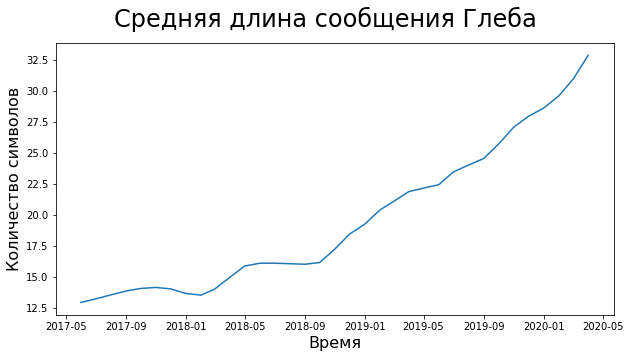

In [395]:
plot_timeseries('Средняя длина сообщения Глеба', result.trend)

<h2>Mean lenght message Ma</h2>

In [396]:
messages_from_ma.pivot_table(columns='year', values='lenght_of_message')

year,2016,2017,2018,2019,2020
lenght_of_message,14.375,15.714407,14.576499,19.906598,24.764706


In [397]:
ma_message_length_every_month = messages_from_ma.pivot_table(columns=['year_month'], values='lenght_of_message').transpose()
ma_message_length_every_month.head(8)

,lenght_of_message
year_month,
2016-12-01,14.375000
2017-01-01,14.134831
2017-02-01,12.137931
2017-03-01,18.608247
2017-04-01,13.176471
2017-05-01,20.785714
2017-06-01,15.197115
2017-07-01,16.134454


In [398]:
result = seasonal_decompose(ma_message_length_every_month['lenght_of_message'], freq=12, model='additive')

<ipython-input-398-690a440c3d79>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ma_message_length_every_month['lenght_of_message'], freq=12, model='additive')


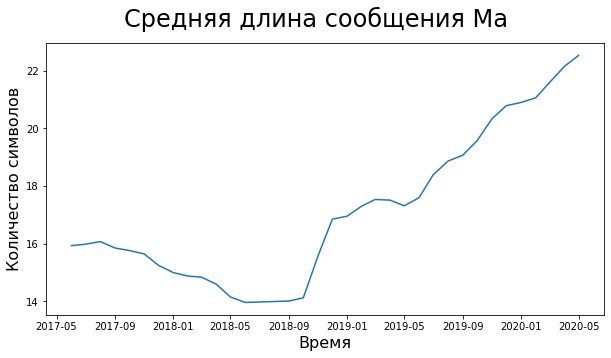

In [399]:
plot_timeseries('Средняя длина сообщения Ma', result.trend)

<h2>Количество сообщений</h2>

In [413]:
number_messages_from_every_month = messages.pivot(columns=['year_month'], values='text').notna().sum()
number_messages_from_every_month.head(8)


year_month
2016-12-01     22
2017-01-01    173
2017-02-01    161
2017-03-01    211
2017-04-01    118
2017-05-01    156
2017-06-01    455
2017-07-01    319
dtype: int64

In [453]:
x = messages.pivot(columns=['year'], values='text').notna().sum().reset_index().iloc[1:].set_index('year')
x.columns = ['number_of_messages']
x.transpose()

year,2017,2018,2019,2020
number_of_messages,2512,1722,2379,2617


In [414]:
result = seasonal_decompose(number_messages_from_every_month, freq=12, model='additive')

<ipython-input-414-ab1839030ce4>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(number_messages_from_every_month, freq=12, model='additive')


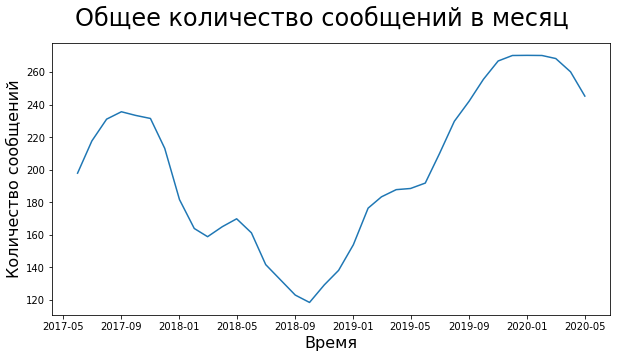

In [447]:
plot_timeseries('Общее количество сообщений в месяц', result.trend, ['Время', 'Количество сообщений'])

<h2>Week day</h2>

In [479]:
number_messages_from_ma_every_month = messages_from_ma.pivot(columns=['year_month', 'week_day'], values='text').notna().sum()
number_messages_from_ma_every_month = number_messages_from_ma_every_month.reset_index().drop(columns=['year_month'], axis=1).pivot_table(columns=['week_day'], aggfunc=sum).sum()
number_messages_from_ma_every_month = number_messages_from_ma_every_month.reset_index()
number_messages_from_ma_every_month


,week_day,0
0,0,686
1,1,668
2,2,573
3,3,585
4,4,749
5,5,542
6,6,558


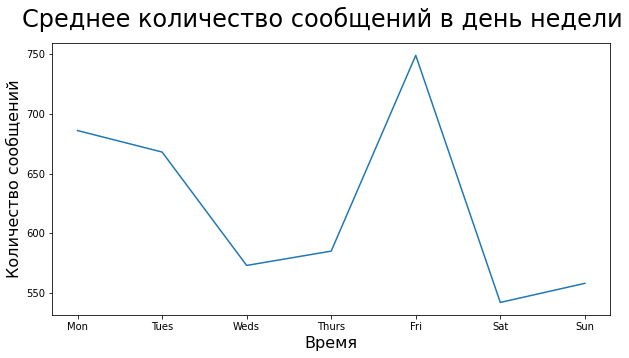

In [480]:
plot_timeseries('Среднее количество сообщений в день недели', number_messages_from_ma_every_month[0], ['Время', 'Количество сообщений'], [list(range(0, 7)), "Mon Tues Weds Thurs Fri Sat Sun".split()])

(500.0, 786.45)

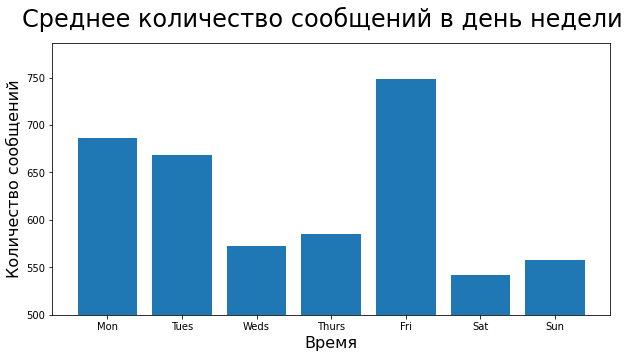

In [492]:
plt.subplots(figsize=(10, 5))
plt.suptitle('Среднее количество сообщений в день недели', size=24)
plt.xlabel('Время', size=16)
plt.ylabel('Количество сообщений', size=16)

ticks = list(range(0, 7))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)

plt.bar(number_messages_from_ma_every_month['week_day'], number_messages_from_ma_every_month[0])
plt.ylim(500)

In [408]:
messages_from_ma[messages_from_ma['duration_seconds'].notna()]

,type,date,actor,action,text,from,duration_seconds,day,week_day,month,year,lenght_of_message,year_month,emoji
782,message,2017-05-19 19:45:53,NaN,NaN,NaN,Анархия,20.0,19,4,5,2017,0,2017-05-01,NaN
2564,message,2018-01-05 10:58:54,NaN,NaN,NaN,Анархия,6.0,5,4,1,2018,0,2018-01-01,NaN
2565,message,2018-01-05 10:59:04,NaN,NaN,NaN,Анархия,6.0,5,4,1,2018,0,2018-01-01,NaN
2884,message,2018-01-30 11:54:36,NaN,NaN,NaN,Анархия,6.0,30,1,1,2018,0,2018-01-01,NaN
2886,message,2018-01-30 11:54:43,NaN,NaN,NaN,Анархия,1.0,30,1,1,2018,0,2018-01-01,NaN
3298,message,2018-03-14 20:34:59,NaN,NaN,NaN,Анархия,68.0,14,2,3,2018,0,2018-03-01,NaN
4118,message,2018-11-18 10:39:49,NaN,NaN,NaN,Анархия,90.0,18,6,11,2018,0,2018-11-01,NaN
4585,message,2019-03-31 14:42:17,NaN,NaN,NaN,Анархия,65.0,31,6,3,2019,0,2019-03-01,NaN
5862,message,2019-09-08 12:04:28,NaN,NaN,NaN,Анархия,6.0,8,6,9,2019,0,2019-09-01,NaN
5863,message,2019-09-08 12:04:52,NaN,NaN,NaN,Анархия,9.0,8,6,9,2019,0,2019-09-01,NaN


<h2>Working with text</h2>

In [557]:
messages_questions = messages_from_ma[messages_from_ma['text'].str.contains('\?', na=False)]
messages_questions

,type,date,actor,action,text,from,duration_seconds,day,week_day,month,year,lenght_of_message,year_month,emoji
14,message,2016-12-24 19:12:34,NaN,NaN,Поздравил?,Анархия,NaN,24,5,12,2016,10,2016-12-01,NaN
25,message,2017-01-03 15:58:40,NaN,NaN,Позвонил?!?!?!?!,Анархия,NaN,3,1,1,2017,16,2017-01-01,NaN
28,message,2017-01-04 21:03:45,NaN,NaN,Позвонил?,Анархия,NaN,4,2,1,2017,9,2017-01-01,NaN
33,message,2017-01-05 19:49:21,NaN,NaN,Позвонил?,Анархия,NaN,5,3,1,2017,9,2017-01-01,NaN
38,message,2017-01-05 20:54:39,NaN,NaN,Готовишься?,Анархия,NaN,5,3,1,2017,11,2017-01-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,message,2020-10-20 18:01:28,NaN,NaN,Все хорошо?,Анархия,NaN,20,1,10,2020,11,2020-10-01,NaN
9217,message,2020-10-20 18:57:17,NaN,NaN,Когда едешь?,Анархия,NaN,20,1,10,2020,12,2020-10-01,NaN
9225,message,2020-10-25 15:53:47,NaN,NaN,Как ты?,Анархия,NaN,25,6,10,2020,7,2020-10-01,NaN
9249,message,2020-11-05 10:58:14,NaN,NaN,Глебушка. Куда пропал?,Анархия,NaN,5,3,11,2020,22,2020-11-01,NaN


In [598]:
index_answer = np.array(messages_questions.index) + 1
copy_messages = messages.reset_index()

result = pd.DataFrame(columns=messages.columns)

for i in index_answer[:-2]:
    j = i
    while True:
        current_object = copy_messages.loc[j]
        if current_object['from'] == 'Maximov Gleb':
            result.loc[len(result)] = current_object
            break
        else:
            j += 1

In [617]:
text_ma = messages_questions['text'][:-2].reset_index().drop('index', axis=1)
text_ma.columns = ['text_ma']
text_ma_with_answer = text_ma.copy()
text_ma_with_answer['text_gleb'] = result['text']
text_ma_with_answer

,text_ma,text_gleb
0,Поздравил?,Да
1,Позвонил?!?!?!?!,Не
2,Позвонил?,Не
3,Позвонил?,Бабе Лиде да
4,Готовишься?,Картошку варю
...,...,...
986,Говорить можешь?,Через пару минут
987,Как ты?,"Да, работаю"
988,Все хорошо?,"Да, работаю"
989,Когда едешь?,На следующие выходные


In [625]:
text_ma_with_answer['text_ma'].value_counts().head(20)

Как дела?             59
Как ты?               46
Ты как?               16
?                     15
Все ок?               15
Все хорошо?           11
Все норм?              7
Как вы?                6
Спишь?                 6
Сдал?                  5
Устал?                 5
В смысле?              5
Говорить можешь?       5
Получил?               5
У тебя все хорошо?     4
Вернулся?              4
Это что?               3
Норм?                  3
Ты где?                3
Как у тебя?            3
Name: text_ma, dtype: int64

In [626]:
text_ma_with_answer['text_gleb'].value_counts().head(20)

Да            98
Нет           21
Хорошо        19
Не            18
Все хорошо    15
да            13
Ок            11
Конечно        9
Нормально      9
нет            8
хорошо         8
Отлично        7
Норм           7
))             6
пойдет         5
Да)            4
Привет         4
норм           4
привет         4
Готова         4
Name: text_gleb, dtype: int64

In [662]:
text_ma_with_answer[text_ma_with_answer['text_ma'] == 'Все хорошо?'][:49].sort_values(by='text_gleb')

,text_ma,text_gleb
579,Все хорошо?,))
679,Все хорошо?,da
712,Все хорошо?,Да
733,Все хорошо?,Да
820,Все хорошо?,Да
555,Все хорошо?,Да конечно
482,Все хорошо?,Да супер
988,Все хорошо?,"Да, работаю"
749,Все хорошо?,Конечно
919,Все хорошо?,Нет


In [655]:
messages[messages['text'] == 'сегодня тухло']

,type,date,actor,action,text,from,sticker_emoji,duration_seconds,day,week_day,month,year,lenght_of_message,year_month,year_month_week_day
4921,message,2019-05-13 20:22:13,NaN,NaN,сегодня тухло,Maximov Gleb,NaN,NaN,13,0,5,2019,13,2019-05-01,2019-05-13
